<a href="https://colab.research.google.com/github/raeditio/UBC-ELEC413-2025Fall/blob/main/KLayout_SiEPIC_SiN_loopback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design for Test rules from layout label: /usr/local/lib/python3.12/dist-packages/dft_aim_siepic_laser_pic_project1/DFT.xml
 - load_Verification, path: /usr/local/lib/python3.12/dist-packages/siepic_ebeam_pdk
 - load_Verification, matches: ['/usr/local/lib/python3.12/dist-packages/siepic_ebeam_pdk/Verification.xml']
No errors found


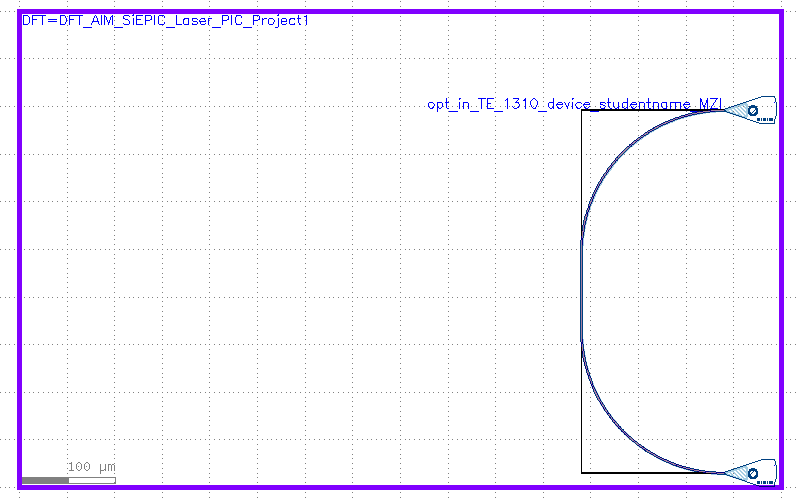

In [ ]:
# Minimal example, of a pair of grating couplers
# and verification using design for test rules for Project 1


try:
    import siepic_ebeam_pdk, dft_aim_siepic_laser_pic_project1
except:
    !pip install siepic_ebeam_pdk dft_aim_siepic_laser_pic_project1 # this includes the dependancies

import pya # KLayout Python API
import SiEPIC  # import module for SiEPIC-Tools, helper functions for KLayout
import siepic_ebeam_pdk  # import module for the SiEPIC-EBeam-PDK technology
from SiEPIC.utils.layout import new_layout

# New layout
tech_name, top_cell_name = 'EBeam', 'Top'
topcell, ly = new_layout(tech_name, top_cell_name)

# Floorplan
from SiEPIC.utils.layout import floorplan
floorplan(topcell, 800e3, 500e3)

# Get Technology
from SiEPIC.utils import get_technology_by_name
TECHNOLOGY = get_technology_by_name(tech_name)

# Grating coupler loopback, as a calibration and test

# Load cell
from SiEPIC.utils import create_cell2
cell = create_cell2(ly, 'GC_SiN_TE_1310_8degOxide_BB', 'EBeam-SiN')

# Instantiate GC in the layout with position and rotation
t = pya.Trans(pya.Trans.R180, 740e3, 15e3)
inst_gc1 = topcell.insert(
    pya.CellInstArray(cell.cell_index(), t))
t = pya.Trans(pya.Trans.R180, 740e3,15e3 + 127e3 * 3)
inst_gc2 = topcell.insert(pya.CellInstArray(cell.cell_index(), t))

# Add label for automated testing, on the top grating coupler
t = pya.Trans(pya.Trans.R0, 740e3,15e3 + 127e3 * 3)
text = pya.Text ("opt_in_TE_1310_device_studentname_MZI", t)
text.halign = pya.Text.HAlignRight
s = topcell.shapes(ly.layer(ly.TECHNOLOGY['Text'])).insert(text)
s.text_size = 10/ly.dbu # font size

# Find out what types of waveguides are defined in the PDK
from SiEPIC.utils import load_Waveguides_by_Tech
waveguide_types = load_Waveguides_by_Tech(tech_name)

for w in waveguide_types:
    if 'SiN' in w['name'] and '1310' in w['name'] and 'w=750' in w['name']:
        wg_type = w['name']

# Draw a waveguide path from one instance pin to another
from SiEPIC.scripts import connect_pins_with_waveguide
wg = connect_pins_with_waveguide(inst_gc1, 'opt1',
                                 inst_gc2, 'opt1',
                                 waveguide_type=wg_type,
                                )

# Verification

# Run verification
# use default design for test rules in the PDK, which should give an error
from SiEPIC.verification import layout_check
# num_errors = layout_check(cell=topcell)

# Design for Test rules
t = pya.Trans(pya.Trans.R0, 0, 500e3)
text = pya.Text ("DFT=DFT_AIM_SiEPIC_Laser_PIC_Project1", t)
text.valign = pya.Text.VAlignTop
topcell.shapes(ly.layer(ly.TECHNOLOGY['Text'])).insert(text).text_size = 10/ly.dbu

# Run verification
num_errors = layout_check(cell=topcell)
#num_errors = layout_check(cell=topcell,
#                          dft_module="dft_aim_siepic_laser_pic_project1")

if not num_errors:
    print(f'No errors found')

topcell.plot(width = 400)

In [ ]:
topcell.show() # in KLayout


Could not connect to klive server. Is klayout open and klive plugin installed?
